# **Introduction**

Hospitals are constantly challenged to provide timely patient care while maintaining high resource utilization. While this challenge has been around for many years, the recent COVID-19 pandemic has increased its prominence. For a hospitals, the ability to predict length of stay (LOS) of a patient as early as possible (at the admission stage) is very useful in managing its resources.

The Statewide Planning and Research Cooperative System (SPARCS) Inpatient De-identified File contains discharge level detail on patient characteristics, diagnoses, treatments, services, and charges.


## Objective

- We are trying to predict if a given patient (i.e. Newborn Child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that - 4 days or more (class 1). 
- I will be using different graphs to understand the underlying relationships between different attributes.
- I am giving equal importance to both the classes of target variable. 
- I am going to try 3 models based on EDA to predict the classes and provide best performance.

## Dataset
The dataset consists of 59966 observations and 15 attributes.
### Input variables:
1. ID (numeric)
2. HealthServiceArea: (Categorical: Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY)
3. Gender
4. Race: (Categorical: Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans and Asian/Pacific Islander)
5. TypeOfAdmission: (Categorical: Elective, Emergency, Newborn, Not Available, Trauma, Urgent)
6. CCSProcedureCode: (Categorical: AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code )
7. APRSeverityOfIllnessCode: (Categorical: Minor (1), Moderate (2),   Major (3), Extreme (4))
8. PaymentTypology: A description of the type of payment for this occurrence. (Categorical)
9. BirthWeight: The neonate birth weight in grams; rounded to nearest 100g. (numeric)
10. EmergencyDepartmentIndicator: Emergency Department Indica- tor is set based on the submitted revenue codes. If the record con- tained an Emergency Depart- ment revenue code of 045X, the indicator is set to ”Y”, other- wise it will be “N”.(numeric)
11. AverageCostInCounty: Average hospitalization Cost In County of the patient(numeric)
12. AverageChargesInCounty: Average medical Charges In County of the patient(numeric)
13. AverageCostInFacility: Average Cost In Facility(numeric)
14. AverageChargesInFacility: Average Charges In Facility(numeric)
15. AverageIncomeInZipCode: Average Income In Zip Code(numeric)

### Output Variable:
16. LengthOfStay: The total number of patient days at an acute level and/or other than acute care level. Class 0 if LengthOfStay <4 and class 1 otherwise

The original data is from [HealthData: Hospital Inpatient Discharges (SPARCS De-Identified)](https://healthdata.gov). The data provided is based on this, with some modifications.

# Importing Required Libraries and Reading Data

In [ ]:
# Importing libraries and reading csv file with index column is equal to the ID
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, make_scorer

data= pd.read_csv('train_data.csv',delimiter=',',index_col=0)
data.head()

,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
ID,,,,,,,,,,,,,,,
1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [ ]:
data.shape

(59966, 15)

# Data Preprocessing

In [ ]:
# deleting 'HealthServiceArea' attribute as per our requirement
data = data.drop(['HealthServiceArea'], axis=1)

In [ ]:
# Changing the length of stay to binary class as per our requirement
data['LengthOfStay'] = np.where(data['LengthOfStay']<4,0,1)

In [ ]:
# Checking for null values and  data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

#### Observation:
- We can observe that there are no null values in the dataset.

In [ ]:
# Checking the frequency count of each of the categorical attributes
for col in data.columns:
    if(data[col].dtypes == object):
        print(data[col].value_counts())

M    30978
F    28987
U        1
Name: Gender, dtype: int64
White                     32943
Other Race                18314
Black/African American     8183
Multi-racial                526
Name: Race, dtype: int64
Newborn      58741
Emergency      659
Urgent         412
Elective       154
Name: TypeOfAdmission, dtype: int64
Medicaid                     28723
Private Health Insurance     15608
Blue Cross/Blue Shield       12073
Self-Pay                      1984
Federal/State/Local/VA         849
Managed Care, Unspecified      545
Miscellaneous/Other            118
Medicare                        44
Unknown                         22
Name: PaymentTypology, dtype: int64
N    59453
Y      513
Name: EmergencyDepartmentIndicator, dtype: int64


#### Observation: 
- We can see that there is an 'Unknown' class in 'Gender' and 'TypeOfAdmission' attribute. We will consider them as a separate class because removing them will lead to data loss and if in future data, there is an unknown class for these attributes, our model won't be able to handle it. 

# Exploratory Data Analysis (EDA)
Here, I will try to explore the underlying relationship in our data.

In [ ]:
# Checking min max and mean of each of our numerical attributes
data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,0.167945
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,0.373821
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,0.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,0.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,0.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,0.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,1.000000


#### Observation:
- We can see that there is a class with negative value (-1) for CCS procedure which can affect our model. I will scale it in order to deal with it.

## Histogram
Histogram is used to check the distribution of attributes

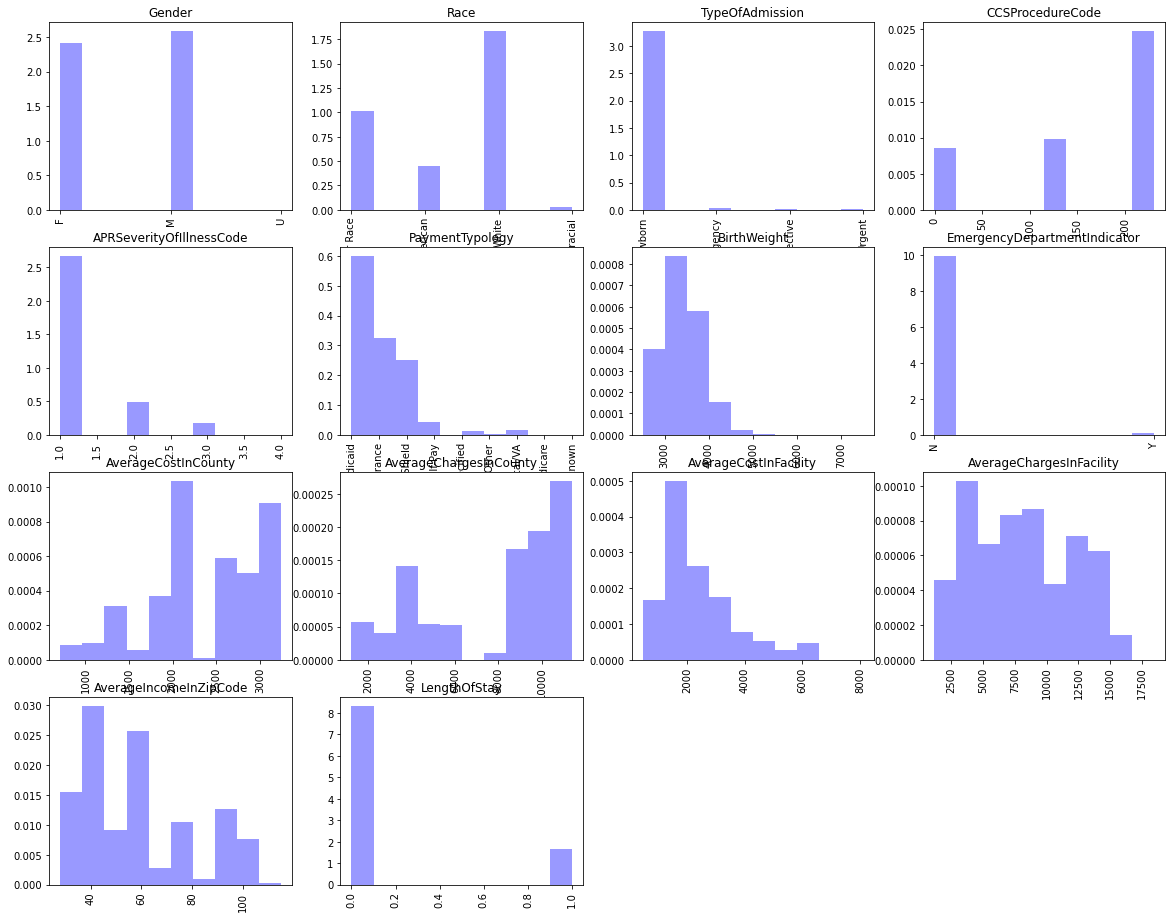

In [ ]:
# plotting histogram for all the columns
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(5,4,i+1)
    plt.hist(data[col], alpha=0.4, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

#### Observation:
1. 'AverageCostInFacility' is right skewed. I am not going to normalize it because the models which I will be using doesn't care about skewed data, they just needs the data to be scaled.
2. Target variable i.e. LengthOfStay is highly imbalanced. Approx 82% of observations belong to class '0'. Therefore, we can expect our models to be biased toward this class.
3. Attributes belong to different scales. Hence, we need to use scaling to bring them to same scale.

## Scatter plot
Scatter plot is used to check the relationship between different numerical attributes and whether there is any separation between the two target classes. 

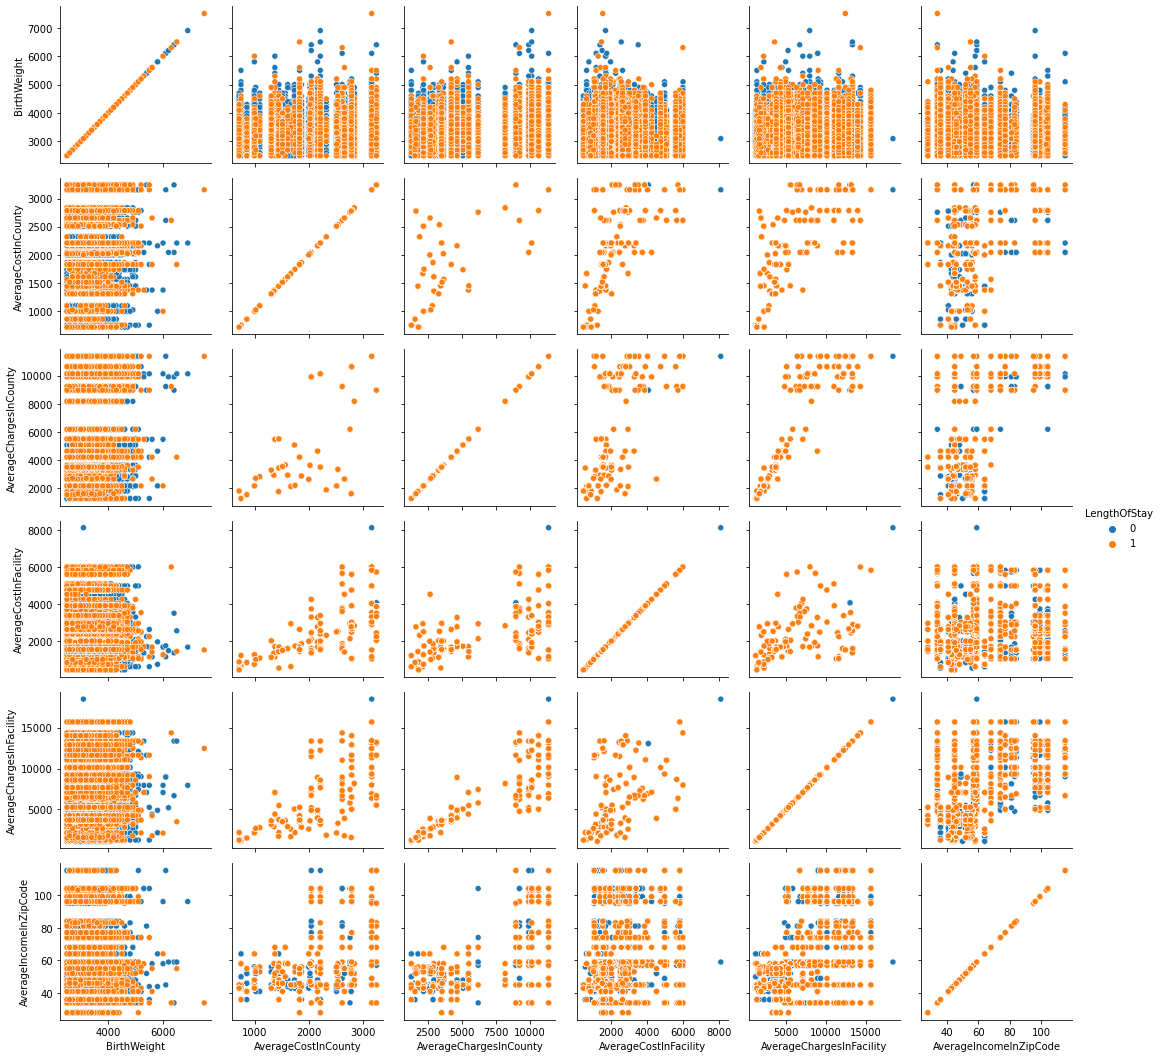

In [ ]:
g = sns.PairGrid(data, vars=['BirthWeight','AverageCostInCounty','AverageChargesInCounty' , 'AverageCostInFacility' , 'AverageChargesInFacility', 
                             'AverageIncomeInZipCode'], hue="LengthOfStay")
g.map(sns.scatterplot)
g.add_legend()
plt.show()

### Observation:
1. Only BirthWeight has some data points which are not overlapping.
2. All the features are highly overlapped between the two classes. From the scatter plot, we can barely see any separation between the target variable.
3. There might be some separation in high dimension between these variables.
4. There is correlation between some the features which we will check futher using heat map and correlation scores.

## Boxplot
Boxplot is used to check extreme values in the dataset and the median, min ,max of all the attributes for both classes of target variable.

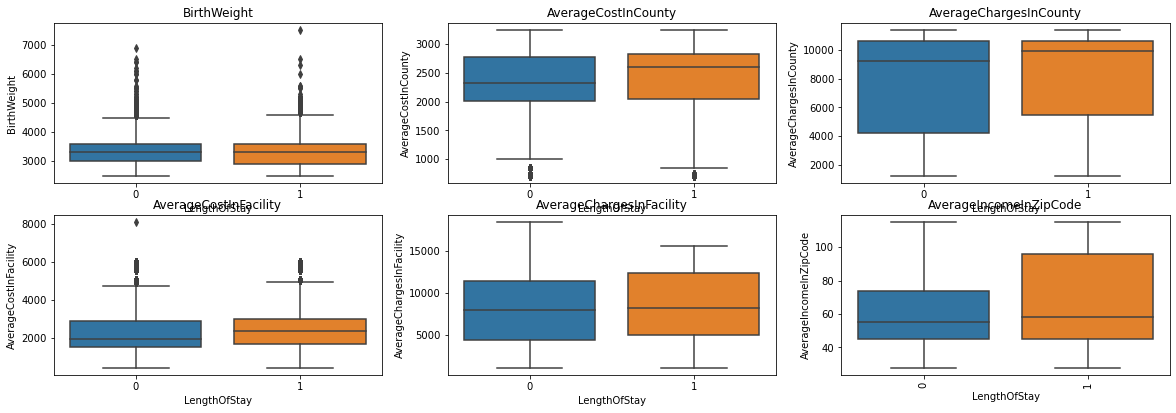

In [ ]:
plt.figure(figsize=(20,10))
i=1
for col in data.columns:
    if data.dtypes[col] == int and col != 'CCSProcedureCode' and col != 'APRSeverityOfIllnessCode' and col != 'LengthOfStay':
        plt.subplot(3,3,i)
        sns.boxplot(x='LengthOfStay',y=col,data=data)
        i = i+1
        plt.title(col)

plt.xticks(rotation='vertical')
plt.show()

### Observation:
1. As seen in previous figures, we can see here that there is high overlap in the values for both the classes.
2. There seems to be some extreme values in the data for attributes like BirthWeight, AverageCostInCount and AverageCostInFacility. We are considering them as extreme values and not outliers because we will be doing min max scaling in order to prevent this issue. Morever, most of the babies are born at average weight.
3. AverageIncomeInZipCode shows bit of a separation between the two classes.

## Correlation Analysis

In [ ]:
data.corr()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
CCSProcedureCode,1.000000,0.062759,-0.048611,0.150886,0.219259,0.012412,0.131750,-0.068257,0.034841
APRSeverityOfIllnessCode,0.062759,1.000000,-0.014400,0.048006,0.048872,0.024172,0.049142,-0.016976,0.274993
BirthWeight,-0.048611,-0.014400,1.000000,-0.049829,-0.068727,-0.038770,-0.061759,0.000202,-0.029268
AverageCostInCounty,0.150886,0.048006,-0.049829,1.000000,0.735078,0.528035,0.614829,0.136916,0.057574
AverageChargesInCounty,0.219259,0.048872,-0.068727,0.735078,1.000000,0.391576,0.831773,0.445202,0.082964
AverageCostInFacility,0.012412,0.024172,-0.038770,0.528035,0.391576,1.000000,0.336937,0.045623,0.064825
AverageChargesInFacility,0.131750,0.049142,-0.061759,0.614829,0.831773,0.336937,1.000000,0.386814,0.077293
AverageIncomeInZipCode,-0.068257,-0.016976,0.000202,0.136916,0.445202,0.045623,0.386814,1.000000,0.095034
LengthOfStay,0.034841,0.274993,-0.029268,0.057574,0.082964,0.064825,0.077293,0.095034,1.000000


### Heat Map
Heat map is used to visualize and check the correlation between different features.

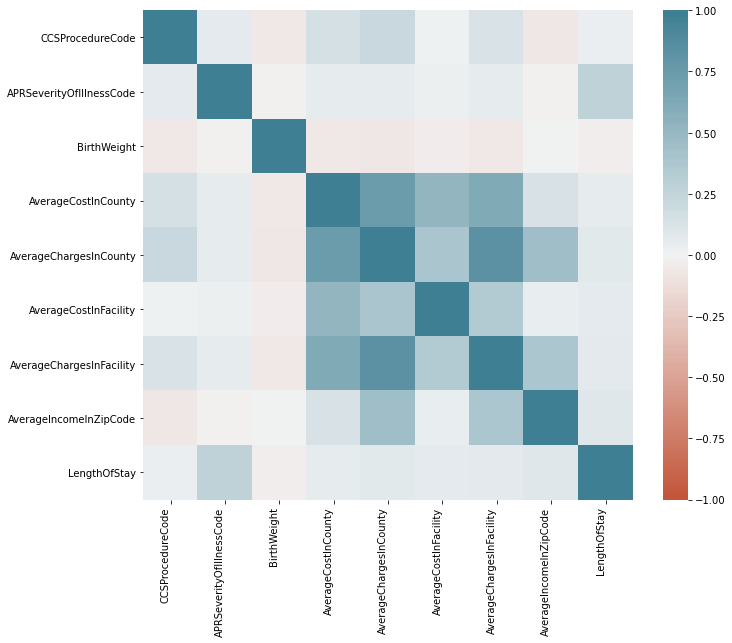

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

#### Observation:
1. There is a high correlation between AverageChargesInCounty and AverageCostInCounty, AverageCostInCounty and AverageChargesInFacility, AverageChargesInFacility and AverageChargesInCounty.
2. No attribute has a correlation with the target variable i.e. LOS. Only APRSeverityOfIllnessCode has some correlation with the target variable.
3. Only APRSeverityOfIllnessCode has some relation with our target class.

Since, there is a high correlation between some of the features. Therefore, we can use just one out of the two correlated attributes in order to get information about the other. Regularization can be used in order to tackle this multicollinearity.

In [ ]:
df_LR = data.copy()

# Encoding Categorical data
- Since our models deal with only numerical attributes, One Hot Encoding of nominal attributes is used.
- One hot encoding is used because although it leads to high dimensionality and sparsity, it keeps all the information intact.
- Dummy encoding could be also tried on this dataset in order to avoid dummy variable trap but since we have separate test set, one hot encoding was chosen. 
- We are not using label encoding because our categorical variables don't follow order.
- 'APRSeverityOfIllnessCode' hasn't been encoded as it is an ordinal attribute and we want to mantain its order. Encoding it will result in loss of ordinal characteristic of the attribute and will be treated as nominal attribute.

In [ ]:
OneHotEncoder_gender = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_gender.fit(df_LR[['Gender']])
onehot_ = OneHotEncoder_gender.transform(df_LR[['Gender']]).toarray()
colName = 'Gender'
for i in range(len(OneHotEncoder_gender.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_gender.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['Gender'], axis=1)


OneHotEncoder_CCSProcedureCode= OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_CCSProcedureCode.fit(df_LR[['CCSProcedureCode']])
onehot_ = OneHotEncoder_CCSProcedureCode.transform(df_LR[['CCSProcedureCode']]).toarray()
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['CCSProcedureCode'], axis=1)


OneHotEncoder_Race = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_Race.fit(df_LR[['Race']])
onehot_ = OneHotEncoder_Race.transform(df_LR[['Race']]).toarray()
colName = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['Race'], axis=1)


OneHotEncoder_TypeOfAdmission = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_TypeOfAdmission.fit(df_LR[['TypeOfAdmission']])
onehot_ = OneHotEncoder_TypeOfAdmission.transform(df_LR[['TypeOfAdmission']]).toarray()
colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['TypeOfAdmission'], axis=1)


OneHotEncoder_PaymentTypology = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_PaymentTypology.fit(df_LR[['PaymentTypology']])
onehot_ = OneHotEncoder_PaymentTypology.transform(df_LR[['PaymentTypology']]).toarray()
colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['PaymentTypology'], axis=1)
    

OneHotEncoder_EmergencyDepartmentIndicator = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_EmergencyDepartmentIndicator.fit(df_LR[['EmergencyDepartmentIndicator']])
onehot_ = OneHotEncoder_EmergencyDepartmentIndicator.transform(df_LR[['EmergencyDepartmentIndicator']]).toarray()
colName = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    df_LR[colName + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_[:,i]
df_LR = df_LR.drop(['EmergencyDepartmentIndicator'], axis=1)

In [ ]:
# !pip install --upgrade category_encoders

# Setting up the performance (evaluation) metric
- I am going to choose macro average F1 score as my performance metric because our data is heavily imbalanced and I am going to give equal importance to both the classes i.e. patients with length of stay greater than 3 days and less than 3 days for proper utilization of resources.  
- I am not going to choose Accuracy, Precision or Recall because they can give large results even if our model just predicts only one of the classes more accurately.
- I will also be checking f1 score of individual classes, 1 and 0 using classification report along with macro average f1 score as I want to get decent accuracy on both the classes.

In [ ]:
def get_f1_scores(clf, train_X, train_y, test_X, test_y):
    train_pred = clf.predict(train_X)
    test_pred = clf.predict(test_X)
    
    train_f1 = f1_score(train_y, train_pred, average='macro')
    test_f1 = f1_score(test_y, test_pred, average='macro')
    
    return train_f1, test_f1

# Data Splitting & Scaling
- I am going to use stratified sampling along with stratified K-Fold cross validation since my data is highly imbalanced and I want same proportion of both the classes in each split.
- I am going to use stratified K-Fold cross validation because I want to check the accuracy of my model on each part of the data. Since my data is imbalanced, if I use hold out validation, there is high chance I won't get a good generalization of my model. 
- Features has been scaled between 0 and 1 using MinMax Scaling so that all of our numerical features are given equal importance otherwise, features with larger values will be dominant. Also, when using gradient descent, θ will descend faster on small ranges than it will on large ranges.
- Power transformation was also applied on the attributes with high skewness but no difference on the performance was observed. Hence, it's removed.

In [ ]:
with pd.option_context('mode.chained_assignment', None):
    train_data, test_data = train_test_split(df_LR, test_size=0.20, 
                                             shuffle=True,random_state=0,stratify=df_LR['LengthOfStay'])

print(train_data.shape[0], test_data.shape[0])

47972 11994


In [ ]:
train_X = train_data.drop(['LengthOfStay',], axis=1).to_numpy()
train_y = train_data[['LengthOfStay']].to_numpy()

test_X = test_data.drop(['LengthOfStay',], axis=1).to_numpy()
test_y = test_data[['LengthOfStay']].to_numpy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

# Baseline Model
- I am going to choose Logistic Regression as my baseline model because it is a classification task and I want to check my model's performance on the simplest model we have learnt so far first.
- Firstly, I am going to use simple linear logistic regression model and check the model's performance on train and test data.


In [ ]:
clf_LR1 = LogisticRegression()
clf_LR1.fit(train_X,train_y.ravel())
train_f1, test_f1 =get_f1_scores(clf_LR1,train_X,train_y,test_X,test_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

Train F1-Score score: 0.571
Test F1-Score score: 0.565


/Users/kushagrasingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


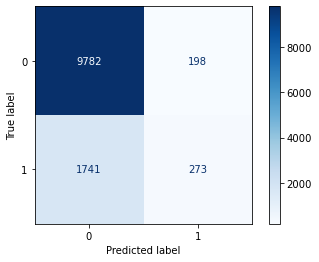

In [ ]:
disp = plot_confusion_matrix(clf_LR1, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,2)],
                                 cmap=plt.cm.Blues)
plt.show()

- As expected, the F1 score of the simple linear logistic model is very low. Hence, we will try to do hyper parameter tuning
- From the above result of confusion matrix, we can see that the model is over-predicting class label 0 as it has high frequency. Hence, we need to use class weight parameter to tackle this issue.

#### Dealing with Class Imbalance
- Oversampling(SMOTE), undersampling(NearMiss) and assigning class weights, all of these techniques were explored to reduce bias and tackle class imbalance.
- After training the model with each of the above mentioned techniques, I have chosen to go with assigning penalty for over predicting classes using classweights as it gave the best performance among the three.

### Regularization and hyper-parameter tuning
- Regularization is used in order to shrink the coefficients of less contributive variables towards 0 and deal with multi-collinearity. Also, we have seen that there is high correlation between some of the attributes. Hence, I will use 'l2'(since l1 is computationally expensive) regularization to use only those features which are more contributive to the right prediction.
- Class weight is used as balanced because we dont want both the classes to have a weight of one since the data is highly imbalanced. This assigns weight to each class inversely proportional to the frequency which it appears.

In [ ]:
f1_scorer = make_scorer(f1_score, average='macro')
lambda_paras = np.logspace(-5, 1, num=10)

cv_results = dict()

for lambda_para in lambda_paras:
    clf_LR2 = LogisticRegression(penalty='l2', C = 1.0/lambda_para, 
                             solver='liblinear', max_iter=1000, 
                             class_weight='balanced')
    
    scores = cross_validate(clf_LR2, train_X, train_y.ravel(), 
                            scoring=f1_scorer, return_estimator=True,
                            return_train_score=True, cv=5)
    cv_results[lambda_para] = scores 

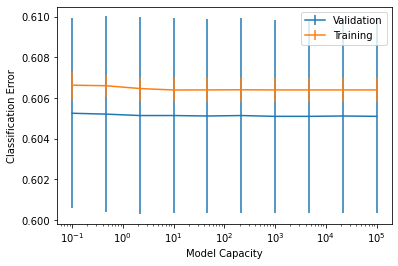

In [ ]:
fig, ax = plt.subplots()

val_means = [np.mean(cv_results[lambda_para]['test_score']) 
             for lambda_para in lambda_paras]

val_std = [np.std(cv_results[lambda_para]['test_score']) 
           for lambda_para in lambda_paras]

train_means = [np.mean(cv_results[lambda_para]['train_score']) 
               for lambda_para in lambda_paras]

train_std = [np.std(cv_results[lambda_para]['train_score']) 
             for lambda_para in lambda_paras]

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            val_means,
            yerr=val_std)

ax.errorbar([1.0/lambda_para for lambda_para in lambda_paras], 
            train_means,
            yerr=train_std)

plt.xscale("log")
plt.ylabel('Classification Error')
plt.xlabel('Model Capacity')
plt.legend(['Validation','Training',])
plt.show()

- From this graph, we can observe that the capacity of model has no effect on the model's accuracy. Hence, our model is not converging.
- We might need to use a more complex model on this dataset.

In [ ]:
# best_lambda = 0.1    # best lambda according to the above figure

# get the split that has the closest performance value to the mean performance
best_classifier_inx = np.argmin(np.abs(cv_results[0.1]['test_score'] - 
                                       np.mean(cv_results[0.1]['test_score'])))

clf_LR2 = cv_results[0.1]['estimator'][best_classifier_inx]

In [ ]:
train_f1, test_f1 =get_f1_scores(clf_LR2,train_X,train_y,test_X,test_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

Train F1-Score score: 0.606
Test F1-Score score: 0.603


In [ ]:
test_pred = clf_LR2.predict(test_X)

print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9980
           1       0.30      0.57      0.40      2014

    accuracy                           0.71     11994
   macro avg       0.60      0.65      0.60     11994
weighted avg       0.80      0.71      0.74     11994



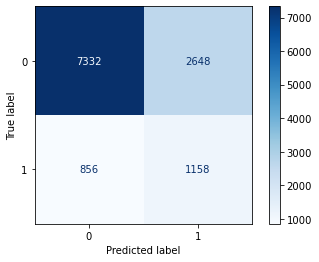

In [ ]:
disp = plot_confusion_matrix(clf_LR2, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,2)],
                                 cmap=plt.cm.Blues)
plt.show()

- Here, we can see that after using class weights and regularization, the model is generalizaing in a better way since our model is predicting class 1 more accurately and not just over predicting the highest frequency class.
- Although the number of correct predictions for class 0 has gone down significantly but this model will be a better predictor in real world.
- Now, I will try to fit a more complex model using polynomial features in order to check if I can use a non linear decision boundary and get a better performance.
- I will also be using grid search along with stratified K-Fold validation in order to get best parameters for my model.

In [ ]:
poly = PolynomialFeatures(2)
poly.fit(train_X)
train_X_poly = poly.transform(train_X)
test_X_poly = poly.transform(test_X)

In [ ]:
log_class = LogisticRegression(class_weight='balanced')

# using grid to check different values for C and penalty
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

# Stratified KFold for maintaining equal proportion in each fold.
cv = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)
logistic_grid = GridSearchCV(log_class,grid,cv=cv,n_jobs=1,scoring='f1_macro')
logistic_grid.fit(train_X_poly,train_y.ravel())

In [ ]:
clf_poly = logistic_grid.best_estimator_

train_f1, test_f1 = get_f1_scores(clf_poly,train_X_poly,train_y,test_X_poly,test_y)
print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

Train F1-Score score: 0.620
Test F1-Score score: 0.610


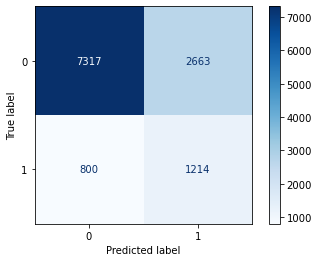

In [ ]:
disp = plot_confusion_matrix (clf_poly, test_X_poly, test_y,
                                 display_labels=[str(i) for i in range(0,2)],
                                 cmap=plt.cm.Blues)
plt.show()

In [ ]:
clf_poly_pred = clf_poly.predict(test_X_poly)

print(classification_report(test_y, clf_poly_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      9980
           1       0.31      0.60      0.41      2014

    accuracy                           0.71     11994
   macro avg       0.61      0.67      0.61     11994
weighted avg       0.80      0.71      0.74     11994



#### Final Observation
- After using polynomial features, the number of right predictions for class 1 has gone up from 1157 to 1217. 
- Model's macro avg F1 score has also gone up however, it's not significant (by 0.1). Hence, I will stick to the simpler model without polynomial features if I have to choose a logistic regression model.

# Decision Tree
- I will use decision tree now as it performs better on imbalanced dataset.
- My dataset contains many categorical columns and decision tree works good with categorical attributes.
- Also, it's more intuitive than logisitic regression.
- Since decision tree is prone to over-fitting, I am going to use random search to find the best parameters for my model where I can get best macro F1 score and least amount of overfitting.
- Max depth, max_leaf_nodes and min_samples_split are the parameters which does best in preventing overfitting. Hence, I am going to use it in my random search.

In [ ]:
random_grid_dtree = {'max_leaf_nodes': list(range(2, 100)), 
                     'min_samples_split': [2, 3, 4], 'max_depth' : [10,20,30,50,75,100]}

cv = StratifiedKFold(n_splits=5,random_state=None,shuffle=False)    

dtree_random = RandomizedSearchCV(DecisionTreeClassifier(random_state= 42,class_weight= 'balanced'), 
                            random_grid_dtree, verbose=1, cv=cv, scoring='f1_macro')

dtree_random.fit(train_X, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'max_depth': [10, 20, 30, 50, 75, 100],
                                        'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8,
                                                           9, 10, 11, 12, 13,
                                                           14, 15, 16, 17, 18,
                                                           19, 20, 21, 22, 23,
                                                           24, 25, 26, 27, 28,
                                                           29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4]},
                   scoring='f1_macro', verbose=1)

In [ ]:
clf_dtree= dtree_random.best_estimator_
clf_dtree.fit(train_X,train_y)

DecisionTreeClassifier(class_weight='balanced', max_depth=100,
                       max_leaf_nodes=85, min_samples_split=3, random_state=42)

In [ ]:
train_f1, test_f1 = get_f1_scores(clf_dtree,train_X,train_y,test_X,test_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

Train F1-Score score: 0.631
Test F1-Score score: 0.624


In [ ]:
test_pred_dtree = clf_dtree.predict(test_X)

In [ ]:
print(classification_report(test_y, test_pred_dtree, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      9980
           1       0.33      0.68      0.44      2014

    accuracy                           0.71     11994
   macro avg       0.62      0.70      0.62     11994
weighted avg       0.82      0.71      0.75     11994



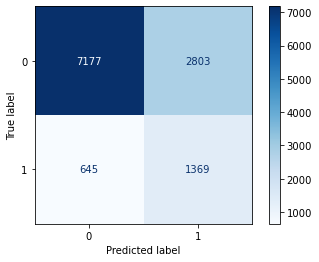

In [ ]:
disp = plot_confusion_matrix (clf_dtree, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,2)],
                                 cmap=plt.cm.Blues)
plt.show()

- We can observe a noticeable increase in the F1 score of class 1. It has increased from 0.41 to 0.44.
- Decision Tree is generalizing better than the Logisitic Regression model on the data. It is prediting more accurately both the classes without any overfitting. 
- I would like to further investigate if my model can perform better with Decision tree ensemble or Random forest.

# Random Forest
- I would like to improve my decision tree further by bagging the tree into an ensemble and utilizing the power of majority voting between all of the trees built.
- Here, I am again using random search since it's less computationally expensive and through trial and error, I am going to select the best model with highest performance.
- I have used all the parameters in a grid which helps in pruning the decision tree and avoid from overfitting.

In [ ]:
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
cv = StratifiedKFold(n_splits=3,random_state=None,shuffle=False)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = cv, verbose=2, random_state=42, n_jobs = -1, scoring='f1_macro')

In [ ]:
clf_rf = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=100,  min_samples_split= 5, min_samples_leaf=4,
                               max_features= 'auto', max_depth= 20,bootstrap=True,ccp_alpha=0.00022)

In [ ]:
clf_rf.fit(train_X,train_y.ravel())

RandomForestClassifier(ccp_alpha=0.00022, class_weight='balanced_subsample',
                       max_depth=20, min_samples_leaf=4, min_samples_split=5)

In [ ]:
train_f1, test_f1 = get_f1_scores(clf_rf,train_X,train_y,test_X,test_y)

print("Train F1-Score score: {:.3f}".format(train_f1))
print("Test F1-Score score: {:.3f}".format(test_f1))

Train F1-Score score: 0.637
Test F1-Score score: 0.630


In [ ]:
test_pred = clf_rf.predict(test_X)

print(classification_report(test_y, test_pred, target_names=[str(i) for i in range(0,2)]))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      9980
           1       0.33      0.68      0.45      2014

    accuracy                           0.72     11994
   macro avg       0.63      0.70      0.63     11994
weighted avg       0.82      0.72      0.75     11994



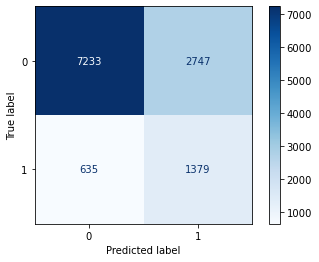

In [ ]:
disp = plot_confusion_matrix (clf_rf, test_X, test_y,
                                 display_labels=[str(i) for i in range(0,2)],
                                 cmap=plt.cm.Blues)
plt.show()

# Checking the most useful feature for model prediction

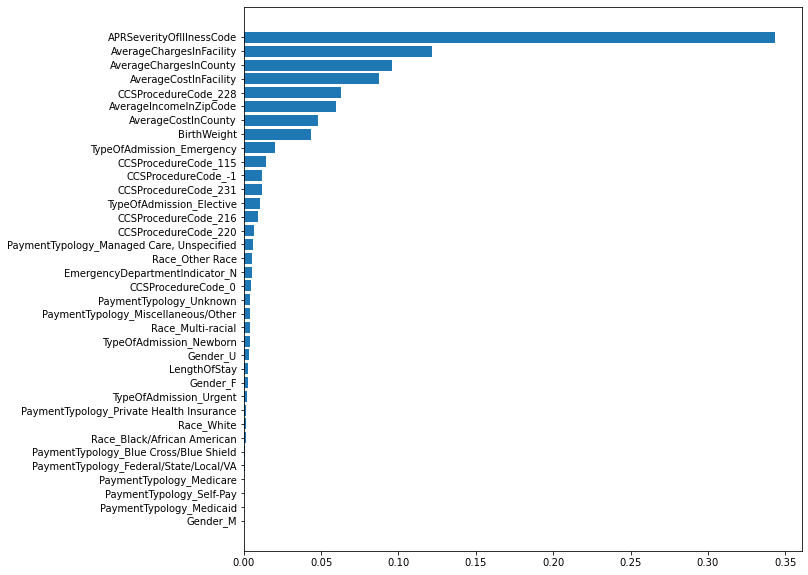

In [ ]:
tree_feature_importances = clf_rf.feature_importances_
sorted_idx = tree_feature_importances.argsort()

plt.figure(figsize=(10,10))
plt.barh(train_data.columns[sorted_idx], tree_feature_importances[sorted_idx])
plt.show()

- Random forest performed the best among all the models. 
- Macro_avg has increased from 0.62 to 0.63
- This will be my final model which I am going to use on my test data.

# Conclusion
- Random Forest gave the best performance out of all the models in predicting both the classes accurately.
- I was able to find the best balance of F1 score for both the classes with the help of Random Forest classifier.
- As observed in our EDA, 'APRSeverityOfIllnessCode' is the best predictor among all the the attributes since it had some amount of correlation with the target attribute.
- After using all the above models, we were not able to predict  the second class i.e. LengthOfStay =1 very accurately. We might need to collect more data for this class so that our model can perform better.

# Testing Random Forest model on Test.csv

In [ ]:
# Testing on actual test data
actual_test= pd.read_csv('test_data.csv',delimiter=',',index_col=0)

In [ ]:
actual_test = actual_test.drop(['HealthServiceArea'], axis=1)

In [ ]:
onehot_ = OneHotEncoder_gender.transform(actual_test[['Gender']]).toarray()
colName = 'Gender'
for i in range(len(OneHotEncoder_gender.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_gender.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['Gender'], axis=1)

onehot_ = OneHotEncoder_CCSProcedureCode.transform(actual_test[['CCSProcedureCode']]).toarray()
colName = 'CCSProcedureCode'
for i in range(len(OneHotEncoder_CCSProcedureCode.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_CCSProcedureCode.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['CCSProcedureCode'], axis=1)

onehot_ = OneHotEncoder_Race.transform(actual_test[['Race']]).toarray()
colName = 'Race'
for i in range(len(OneHotEncoder_Race.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_Race.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['Race'], axis=1)



onehot_ = OneHotEncoder_TypeOfAdmission.transform(actual_test[['TypeOfAdmission']]).toarray()
colName = 'TypeOfAdmission'
for i in range(len(OneHotEncoder_TypeOfAdmission.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_TypeOfAdmission.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['TypeOfAdmission'], axis=1)



onehot_ = OneHotEncoder_PaymentTypology.transform(actual_test[['PaymentTypology']]).toarray()
colName = 'PaymentTypology'
for i in range(len(OneHotEncoder_PaymentTypology.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_PaymentTypology.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['PaymentTypology'], axis=1)
    

onehot_ = OneHotEncoder_EmergencyDepartmentIndicator.transform(actual_test[['EmergencyDepartmentIndicator']]).toarray()
colName = 'EmergencyDepartmentIndicator'
for i in range(len(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0])):
    actual_test[colName + '_' + str(OneHotEncoder_EmergencyDepartmentIndicator.categories_[0][i])] = onehot_[:,i]
actual_test = actual_test.drop(['EmergencyDepartmentIndicator'], axis=1)

In [ ]:
actual_test_X = scaler.transform(actual_test)

In [ ]:
actual_test_pred = clf_rf.predict(actual_test_X)

In [ ]:
prediction= pd.read_csv('s123456_predictions.csv')

In [ ]:
prediction['LengthOfStay']= actual_test_pred
prediction

,ID,LengthOfStay
0,1,1
1,2,0
2,3,1
3,4,0
4,5,1
...,...,...
69172,69173,0
69173,69174,1
69174,69175,0
69175,69176,0


In [ ]:
prediction.to_csv('/Users/kushagrasingh/Desktop/s3820789_predictions.csv',index=False)